<a href="https://colab.research.google.com/github/githubshathik/Assignment-10-16/blob/shathik/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advance programming and Master data science

Assignment 15 :Decision_Trees_Assignment15

Name:Mohamed Shathik

Batch:D10(B)

Dept:Data Science

mail id:mohamedshafa17@gmail.com

In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd

**Importing the dataset**

In [3]:
data=pd.read_csv('/content/Social_Network_Ads (1).csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
from sklearn import preprocessing 

data["Gender"]=data[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [5]:
data=data.drop(columns="User ID")
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


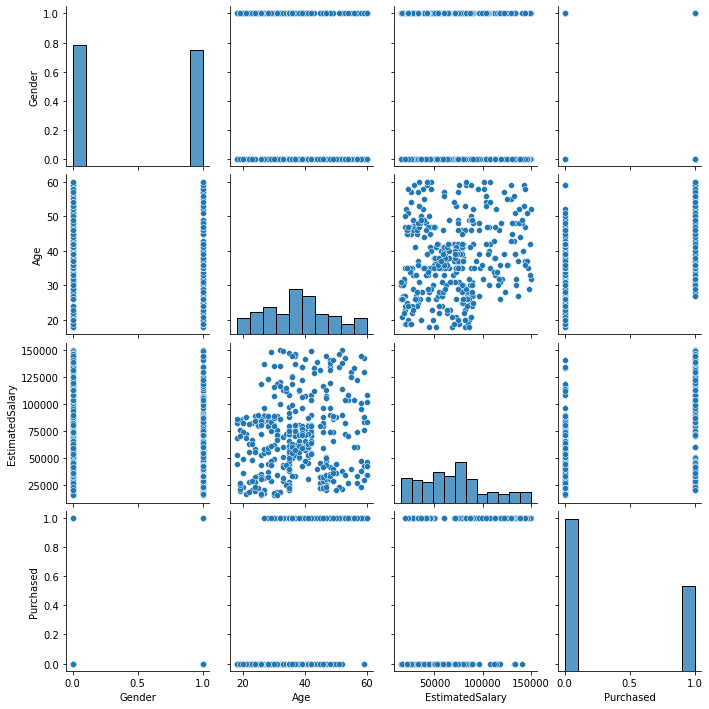

In [6]:
import seaborn as sns
sns.pairplot(data)

In [7]:
X=data.drop(columns="Purchased")
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [8]:
Y=data["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [9]:
# Input Data
# X = features

# Output Data
# Y = Purchased


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 5)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (320, 3)
xtest shape :  (80, 3)
ytrain shape :  (320,)
ytest shape :  (80,)


**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
X_train_scaled = scaler.fit_transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

**Fitting Decision Tree Classification to the Training set**

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth=2)

# Fit dt to the training set
dt.fit(X_train, Y_train) # it will ask all possible questions, compute the information gain and choose the best split



DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [12]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [13]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[48  5]
 [ 1 26]]


In [14]:

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.84      0.96      0.90        27

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



Test set accuracy: 0.93
Train set auc: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


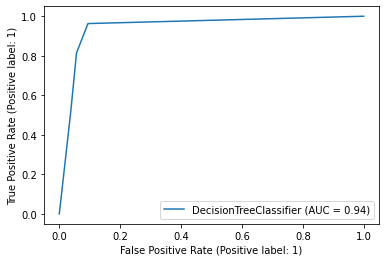

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(Y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(Y_test, y_pred)
print("Train set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, Y_test)

**Visualising the Training set results**

[Text(697.5, 362.4, 'X[1] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(348.75, 217.44, 'X[2] <= 89500.0\ngini = 0.273\nsamples = 227\nvalue = [190, 37]'),
 Text(174.375, 72.47999999999996, 'gini = 0.071\nsamples = 189\nvalue = [182, 7]'),
 Text(523.125, 72.47999999999996, 'gini = 0.332\nsamples = 38\nvalue = [8, 30]'),
 Text(1046.25, 217.44, 'X[1] <= 46.5\ngini = 0.256\nsamples = 93\nvalue = [14, 79]'),
 Text(871.875, 72.47999999999996, 'gini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(1220.625, 72.47999999999996, 'gini = 0.191\nsamples = 75\nvalue = [8, 67]')]

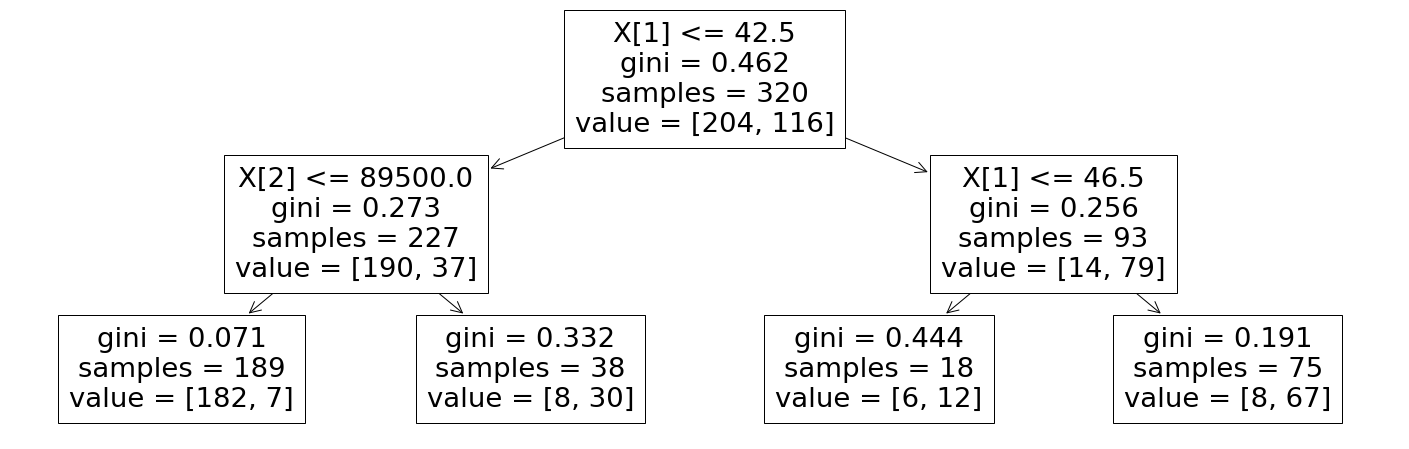

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))

from sklearn import tree

tree.plot_tree(dt.fit(X_train, Y_train)) 

In [17]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, Y_train) # the model is trained
  trainAccuracy = accuracy_score(Y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, Y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print(depth, trainAccuracy, np.mean(valAccuracy))


1 0.840625 0.825
2 0.909375 0.8949999999999999
3 0.909375 0.85
4 0.925 0.8724999999999999
5 0.94375 0.8775000000000001
6 0.953125 0.8674999999999999
7 0.971875 0.8574999999999999
8 0.98125 0.8525
9 0.99375 0.8399999999999999
10 0.99375 0.8400000000000001
20 0.996875 0.8425
40 0.996875 0.8375
60 0.996875 0.8474999999999999


**Visualising the Test set results**

[Text(304.3636363636364, 403.81714285714287, 'X[1] <= 43.5\ngini = 0.447\nsamples = 80\nvalue = [53, 27]'),
 Text(182.61818181818182, 341.69142857142856, 'X[2] <= 93000.0\ngini = 0.262\nsamples = 58\nvalue = [49, 9]'),
 Text(121.74545454545455, 279.5657142857143, 'X[1] <= 36.5\ngini = 0.039\nsamples = 50\nvalue = [49, 1]'),
 Text(60.872727272727275, 217.44, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(182.61818181818182, 217.44, 'X[1] <= 37.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(121.74545454545455, 155.3142857142857, 'X[2] <= 72500.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(60.872727272727275, 93.18857142857144, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(182.61818181818182, 93.18857142857144, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(243.4909090909091, 155.3142857142857, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(243.4909090909091, 279.5657142857143, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(426.1090909090909, 341.6914285

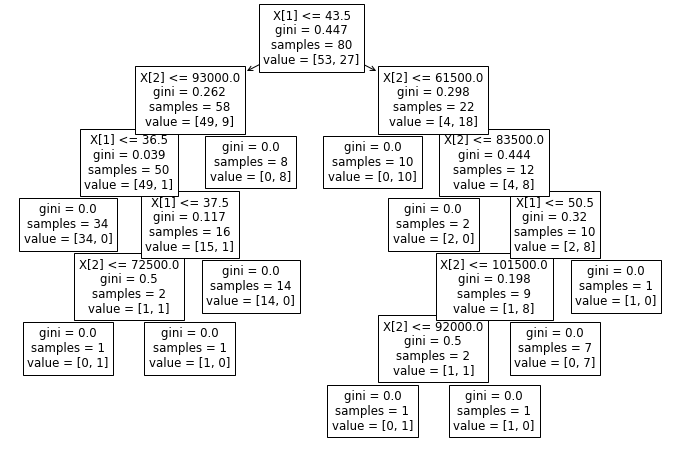

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt.fit(X_test, Y_test)) 

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [20]:
y_pred_en = clf_en.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9250


In [22]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_en)))

Training-set accuracy score: 0.9094


In [24]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.9094
Test set score: 0.9250


[Text(334.8, 362.4, 'X[1] <= 43.5\nentropy = 0.922\nsamples = 80\nvalue = [53, 27]'),
 Text(167.4, 217.44, 'X[2] <= 93000.0\nentropy = 0.623\nsamples = 58\nvalue = [49, 9]'),
 Text(83.7, 72.47999999999996, 'entropy = 0.141\nsamples = 50\nvalue = [49, 1]'),
 Text(251.10000000000002, 72.47999999999996, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(502.20000000000005, 217.44, 'X[2] <= 61500.0\nentropy = 0.684\nsamples = 22\nvalue = [4, 18]'),
 Text(418.5, 72.47999999999996, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(585.9, 72.47999999999996, 'entropy = 0.918\nsamples = 12\nvalue = [4, 8]')]

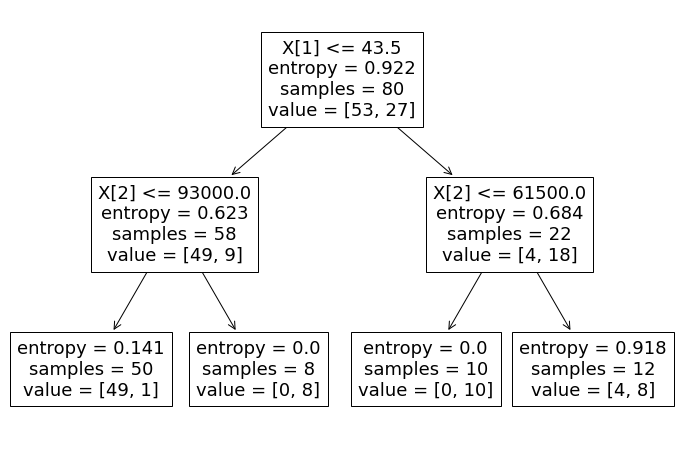

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_test, Y_test)) 

[Text(334.8, 362.4, 'X[1] <= 42.5\nentropy = 0.945\nsamples = 320\nvalue = [204, 116]'),
 Text(167.4, 217.44, 'X[2] <= 89500.0\nentropy = 0.641\nsamples = 227\nvalue = [190, 37]'),
 Text(83.7, 72.47999999999996, 'entropy = 0.229\nsamples = 189\nvalue = [182, 7]'),
 Text(251.10000000000002, 72.47999999999996, 'entropy = 0.742\nsamples = 38\nvalue = [8, 30]'),
 Text(502.20000000000005, 217.44, 'X[2] <= 38500.0\nentropy = 0.611\nsamples = 93\nvalue = [14, 79]'),
 Text(418.5, 72.47999999999996, 'entropy = 0.216\nsamples = 29\nvalue = [1, 28]'),
 Text(585.9, 72.47999999999996, 'entropy = 0.728\nsamples = 64\nvalue = [13, 51]')]

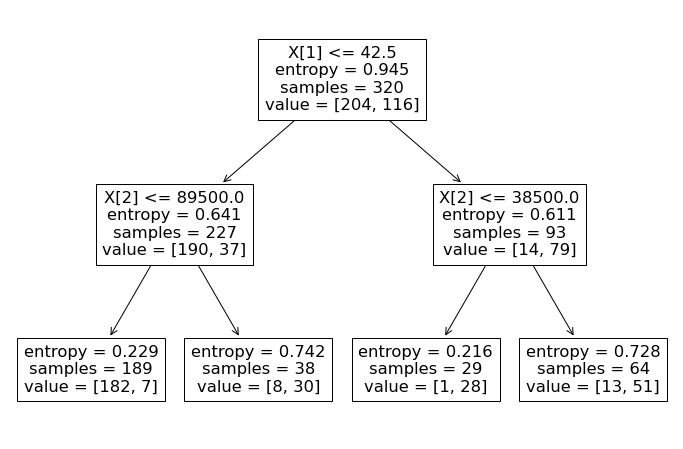

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train)) 

In [27]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[48  5]
 [ 1 26]]


In [28]:

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.84      0.96      0.90        27

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

